In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [173]:
mall = pd.read_csv('C:/Users/DeLL/OneDrive/ML Datasets/Mall_Customers.csv')
mall.head(10)

,CustomerID,Genre,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [36]:
x = mall['Income']
y = mall['SpendingScore']

Text(0, 0.5, 'SpendingScore')

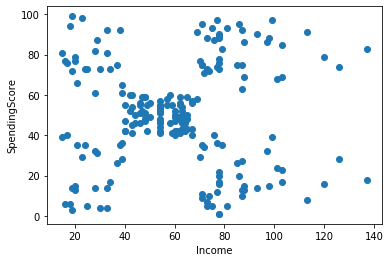

In [46]:
plt.scatter(mall['Income'],mall['SpendingScore'])
plt.xlabel('Income')
plt.ylabel('SpendingScore')

In [49]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
km.fit(mall[['Income','SpendingScore']])  #fitting a 2D array

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [55]:
km.cluster_centers_

array([[26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

In [56]:
km.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

Text(0, 0.5, 'SpendingScore')

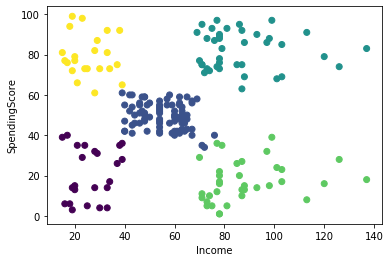

In [54]:
plt.scatter(x,y, c=km.labels_)
plt.xlabel('Income')
plt.ylabel('SpendingScore')

In [102]:
array = np.array([mall['Income'],mall['SpendingScore']])
array = array.reshape((200,2))
array.shape

(200, 2)

In [84]:
X = mall.iloc[:, [3,4]].values

#Using the elbow method to find h optimal number of clusters

ls = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    ls.append(km.inertia_)  # Sum of squared distances of samples to their closest cluster centre
    

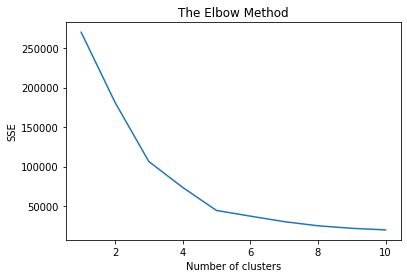

In [86]:
plt.plot(range(1,11), ls)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [105]:
# Fitting KMeans to the dataset
km = KMeans(n_clusters=5)
y_kmeans = km.fit_predict(X)

In [106]:
km.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

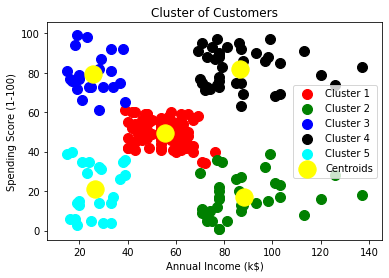

In [110]:
#visualizing the clusters

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'cyan', label = 'Cluster 5')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s = 300, c= 'yellow', label = 'Centroids')
plt.title('Cluster of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Visualization

In [111]:
income = mall.groupby(['Genre'])['Income'].sum().reset_index()

In [112]:
income

,Genre,Income
0,Female,6636
1,Male,5476


<BarContainer object of 2 artists>

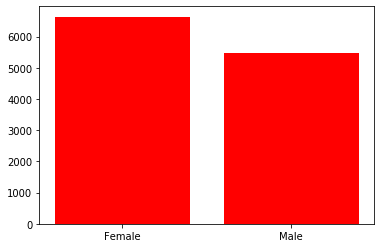

In [127]:
plt.bar(income['Genre'], height = income['Income'], data = income, color = 'r')

In [171]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


## KNN

In [148]:
x = mall[['CustomerID','Age','Income','SpendingScore']]
y = mall['Genre']

In [150]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
print(x_train.shape)
print(y_train.shape)

(160, 4)
(160,)


In [157]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [158]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [159]:
print("kNN Score=",knn.score(x_test,y_test)*100)        


y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print("Confusion matrix is:", cm ,sep='\n')

kNN Score= 52.5
Confusion matrix is:
[[17  3]
 [16  4]]


## Logistic Regression

In [161]:
model = LogisticRegression()
model.fit(x_train, y_train)

print("Log reg score on hr_fianl data set", model.score(x_test, y_test))
y_pred = model.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix is:", cm, sep='\n')

C:\Users\DeLL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Log reg score on hr_fianl data set 0.5
Confusion Matrix is:
[[20  0]
 [20  0]]


## Decision Tree

In [162]:
from sklearn.tree import DecisionTreeClassifier

In [163]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [168]:
clf.score(x_test, y_test)

0.575

## Hierarchical Clustering


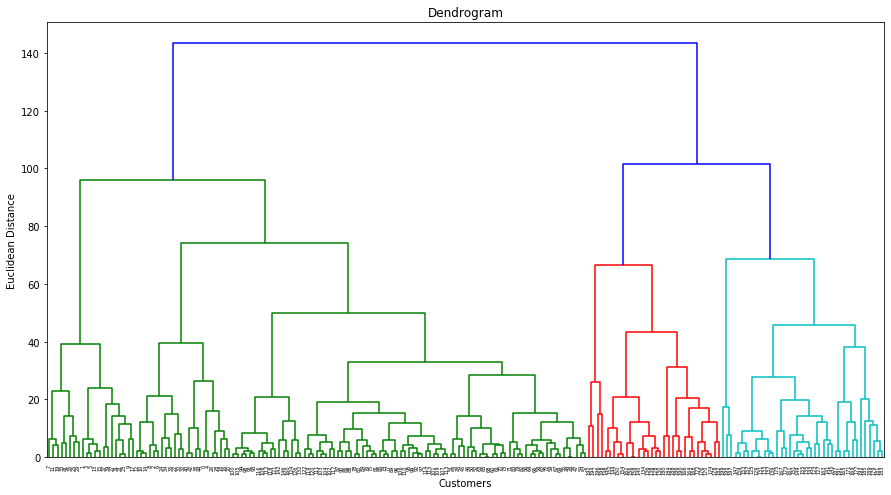

In [179]:
# using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

X = mall.iloc[:, [3,4]].values
plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(X,method = 'complete'))

#sch.dendrogram(sch.linkage(X, method = 'ward'))  #minimum variance method
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

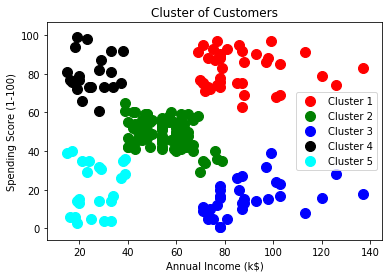

In [186]:
#Fitting hierarchical clustering to the dataset

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage = 'complete')
y_hc = hc.fit_predict(X)


#visualizing the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'cyan', label = 'Cluster 5')


plt.title('Cluster of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [187]:
mall['hclabels'] = hc.labels_
mall['kmlabels'] = km.labels_

In [190]:
mall['Gender'] = mall['Genre'].map({'Male':1,'Female':2})

In [192]:
mall.drop(['Genre'],axis = 1, inplace =True)

In [193]:
mall.head()

,CustomerID,Age,Income,SpendingScore,hclabels,kmlabels,Gender
0,1,19,15,39,4,4,1
1,2,21,15,81,3,2,1
2,3,20,16,6,4,4,2
3,4,23,16,77,3,2,2
4,5,31,17,40,4,4,2


In [ ]:
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(mall[['Age','Income','SpendingScore','hclabels','kmlabels']])